## Homework 3 Exercise 5

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### License and citation

Link to original data: https://archive.ics.uci.edu/dataset/571/hcv+data

This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license. Full license description can be found at:
https://creativecommons.org/licenses/by/4.0/legalcode
This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

Citation:
Lichtinghagen,Ralf, Klawonn,Frank, and Hoffmann,Georg. (2020). HCV data. UCI Machine Learning Repository. https://doi.org/10.24432/C5D612.

### Load data

Dataset name: 'hcvdat0.csv'

Dataset information: This data is to classify patients into categories (blood donors vs. Hepatitis C, including its progress: 'just' Hepatitis C, Fibrosis, Cirrhosis). 

In [9]:
df_raw = pd.read_csv('hcvdat0.csv')

### EDA

In [10]:
# quick view of the raw data
df_raw.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [12]:
# drop the unnamed:0 column with no meaning
df_raw.rename(columns = {"Unnamed: 0": "Patient_id"}, inplace=True)
df_raw.head()

,Patient_id,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [8]:
# summary statistics
df_raw.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [36]:
target_name = "Category"
feature_names = [name for name in df_raw.columns if name not in [target_name, "Patient_id"]]
# extract features
features = df_raw[feature_names]
features.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [18]:
print(f"The number of features we have is {len(features.columns)}")
print(f"The number of rows we have is {len(features.iloc[:, 0])}")

The number of features we have is 12
The number of rows we have is 615


In [69]:
target = df_raw["Category"]

#### Visualize Distributions

Our variables have the following types:
* Binary: Sex
* Categorical: Category
* Continuous: All the other measurements

We can use bar plots, box plots and histograms to visualize the distributions.

In [27]:
def patient_info_histograms(df):
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 15))
    fig.suptitle('Distribution Plots', fontsize=16)

    # Plot for 'Category' (Bar Chart)
    cat_counts = df['Category'].value_counts()
    axes[0, 0].bar(cat_counts.index, cat_counts.values, color='lightgreen')
    axes[0, 0].set_title('Category Distribution')
    axes[0, 0].set_xlabel('Category')
    axes[0, 0].set_ylabel('Count')

    # Plot for 'Sex' (Bar Chart)
    gender_counts = df['Sex'].value_counts()
    axes[0, 1].bar(gender_counts.index, gender_counts.values, color='lightcoral')
    axes[0, 1].set_title('Sex Distribution')
    axes[0, 1].set_xlabel('Sex')
    axes[0, 1].set_ylabel('Count')

    # Plot for 'ALP' (Histogram)
    axes[1, 0].hist(df['ALP'], bins=12, color='skyblue', edgecolor='black')
    axes[1, 0].set_title('ALP Histogram')
    axes[1, 0].set_xlabel('ALP')
    axes[0, 0].set_ylabel('Frequency')

    # Plot for 'CHOL' (Histogram)
    axes[1, 1].hist(df['CHOL'], bins=12, color='lightseagreen', edgecolor='black')
    axes[1, 1].set_title('CHOL Histogram')
    axes[1, 1].set_xlabel('CHOL')
    axes[1, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.savefig("Patient_info Distribution Plots.jpg")

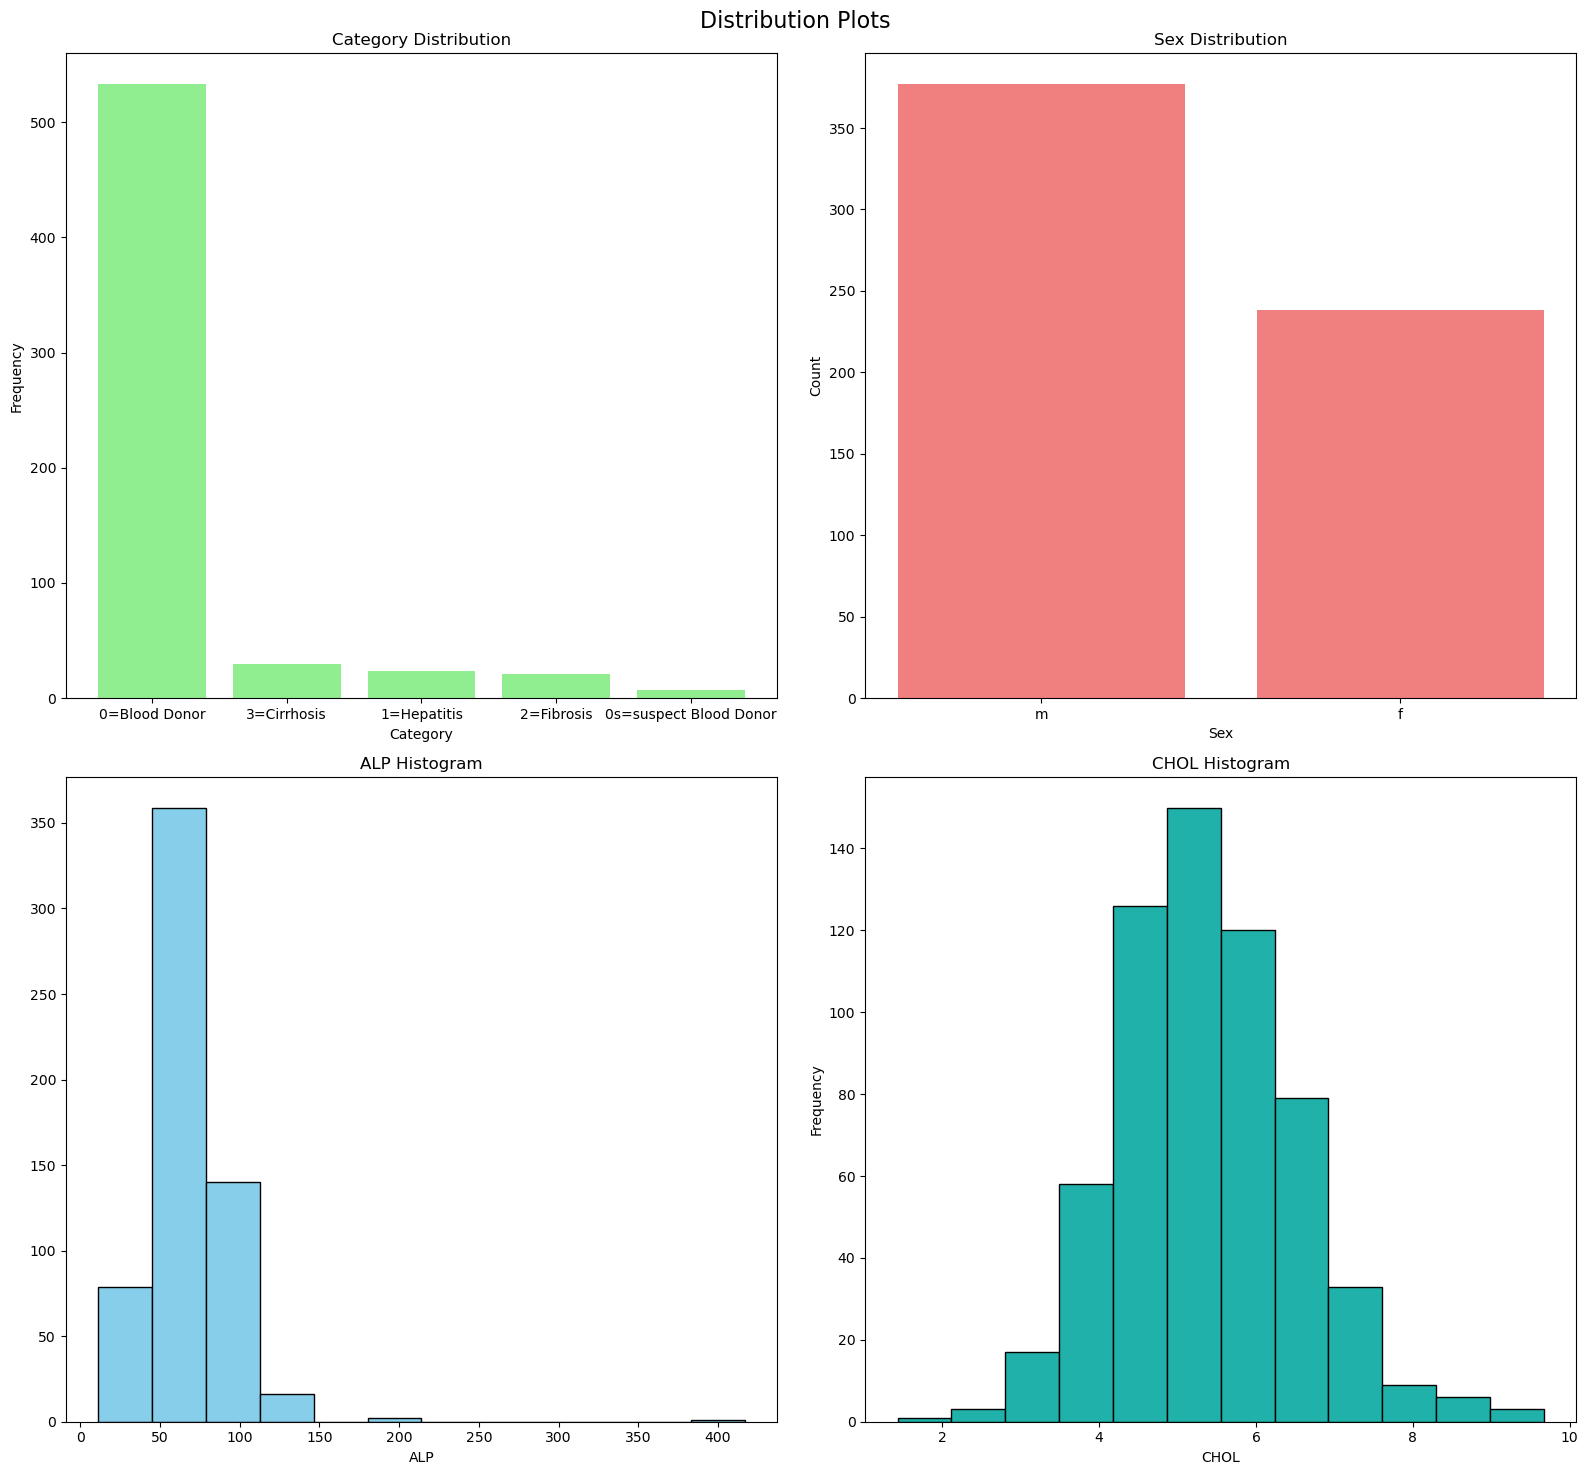

In [28]:
patient_info_histograms(df_raw)

According to "Category Distribution", we can observe that our target variable is highly imbalanced, with the majority of patients in the category "Blood Donor". The sex distribution shows that the male is the dominant sex group. We select 2 continuous features, ALP and CHOL, to plot histograms. The histograms are both slighly right skewed, and we can see some potential outliers (at 200 and 400) for ALP.

In [49]:
def boxplot_selected(df): 
    fig, ax = plt.subplots()

    ax.boxplot(df['CHE'], positions=[1], labels=['CHE'])

    ax.boxplot(df['BIL'], positions=[2], labels=['BIL'])

    ax.set_xlabel('Features')
    ax.set_ylabel('Values')
    ax.set_title('Boxplots')

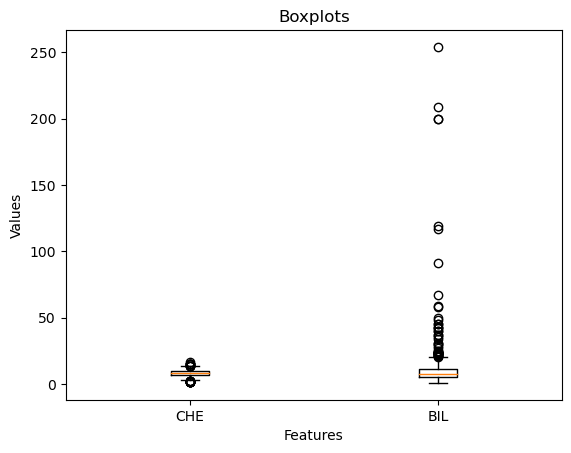

In [50]:
boxplot_selected(features)

According to the boxplots of CHE and BIL, although their median values are close to each other, we can see that their distributions are very different. BIL has many data points larger than the third quantile. The values of CHE are all distributed closely around the median.

#### Correlation Analysis

/Users/cynthia/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


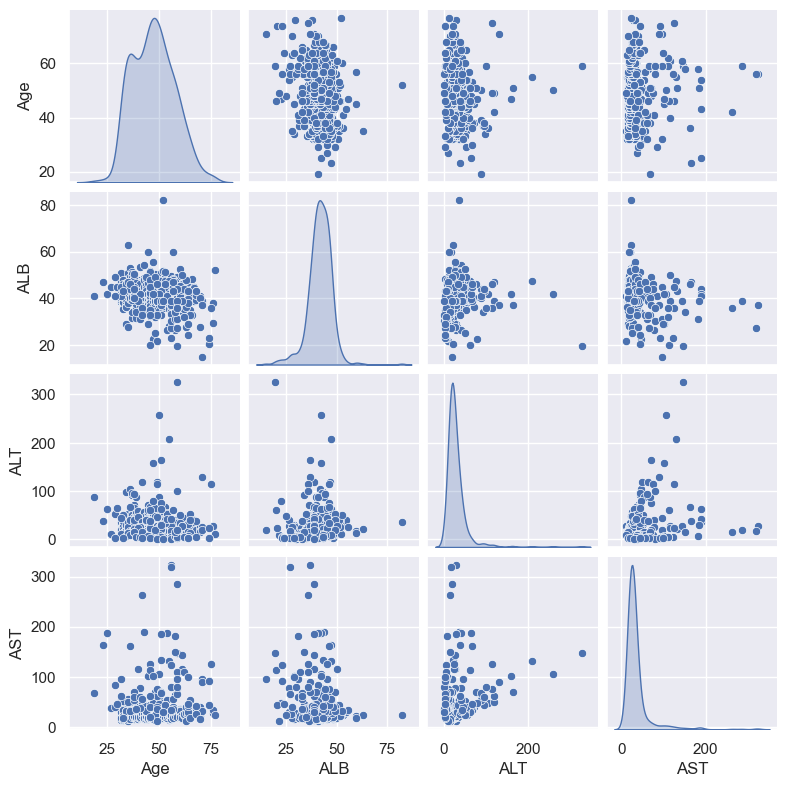

In [52]:
# selected features
columns = ["Age", 'ALB', "ALT", "AST"]
sns.set()
sns.pairplot(features[columns],size = 2 ,kind ='scatter',diag_kind='kde')

The correlation plots do not show any significant correlation, and we can suppose that these features are relatively independently pairwisely.

### Data Cleaning

#### Explore Missing Values

In [20]:
print("Compute the number of missing values for each column:")
features.isna().sum()
# sorted(features_all.isna().sum(), reverse = True)

Compute the number of missing values for each column:


Age      0
Sex      0
ALB      1
ALP     18
ALT      1
AST      0
BIL      0
CHE      0
CHOL    10
CREA     0
GGT      0
PROT     1
dtype: int64

In [22]:
# get the number of missing values
total = features.isna().sum().sort_values(ascending=False)
percent = (features.isnull().sum()/features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data

,Total Missing Count,% of Total Observations
ALP,18,0.029268
CHOL,10,0.016260
ALB,1,0.001626
ALT,1,0.001626
PROT,1,0.001626
Age,0,0.000000
Sex,0,0.000000
AST,0,0.000000
BIL,0,0.000000
CHE,0,0.000000


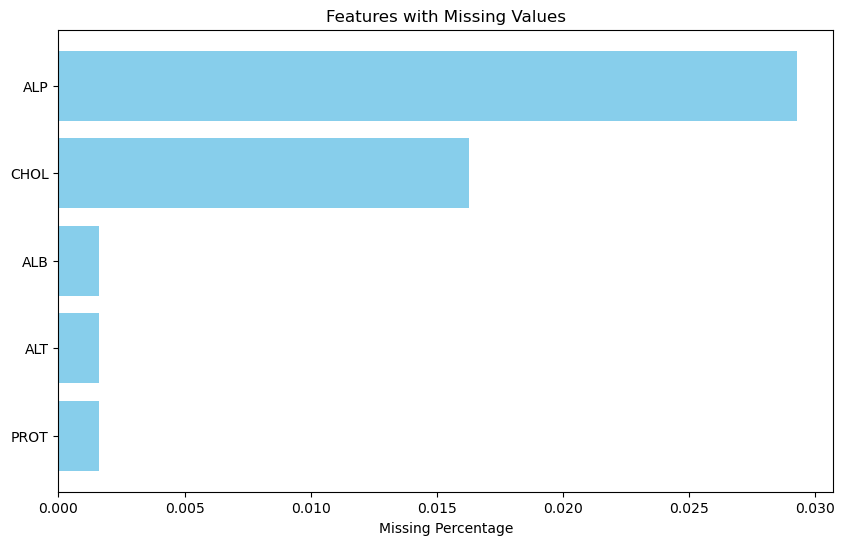

In [23]:
# Create a horizontal bar plot for the top ten missing features
top_missing_data = missing_data.iloc[:5, 1]
top_missing_data
plt.figure(figsize=(10, 6))
plt.barh(top_missing_data.index, top_missing_data, color='skyblue')
plt.xlabel('Missing Percentage')
plt.title('Features with Missing Values')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest missing feature at the top
# plt.savefig("Features with Missing Values.jpg")

The figure above shows the percentage of missing values for 5 features. In fact, the proportion of missing values is not very large, so there is no need to delete any features. Also, we may assume that missing value imputation may not have very significant influence on the original distribution and variance. Since all the features with missing values are continuous variables, we may try to replace missing values with median.

In [30]:
def handle_missing(df: pd.DataFrame):
    df_filled = df.fillna(df.median())
    return df_filled

In [31]:
features_filled = handle_missing(features)

/var/folders/ch/1v21vldj0m1dk5lxd7kjbrh80000gn/T/ipykernel_84335/1479313281.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.median())


In [33]:
(features_filled.isna().sum()).sum()

0

#### Label Category and Convert Data Type

1. We need to label categorical variables: Sex, and Category with numerical values (e.g. integers), so that they can be applied in dimensionality reduction and classfication machine learning models.
2. The data types of Sex and Category are not 'category' right now, so we need to convert dtypes for them.

In [53]:
features_filled.dtypes

Age       int64
Sex      object
ALB     float64
ALP     float64
ALT     float64
AST     float64
BIL     float64
CHE     float64
CHOL    float64
CREA    float64
GGT     float64
PROT    float64
dtype: object

In [54]:
target.dtypes

dtype('O')

In [74]:
category_mapping = {
    '0=Blood Donor': 0,
    '0s=suspect Blood Donor': 1,
    '1=Hepatitis': 2,
    '2=Fibrosis': 3,
    '3=Cirrhosis': 4
}

In [75]:
target_label = target.map(category_mapping)

In [78]:
target_label = target_label.astype('category')
target_label

0      0
1      0
2      0
3      0
4      0
      ..
610    4
611    4
612    4
613    4
614    4
Name: Category, Length: 615, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]

In [79]:
features_filled['Sex']

0      m
1      m
2      m
3      m
4      m
      ..
610    f
611    f
612    f
613    f
614    f
Name: Sex, Length: 615, dtype: object

In [80]:
category_mapping = {
    'f': 0,
    'm': 1
}
features_filled['Sex'] = features_filled['Sex'].map(category_mapping)
features_filled['Sex'] = features_filled['Sex'].astype('category')

In [82]:
features_filled

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46,0,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


### Dataframe output

In [83]:
output = features_filled.copy()
output['Category'] = target_label
output.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0


In [84]:
# export dataframe
output.to_csv("processed_hcvdat.csv")